# credit_risk project
# -------------------------------------------------------------------------------------------------

## Introduction : 
### Credit risk refers to the likelihood of a borrower/customer failing to repay a loan, leading to potential financial losses for the lender. When financial institutions extend services like mortgages, credit cards, or personal loans, there exists an inherent risk that the borrower may default on their repayment obligations. To evaluate this risk, factors like credit history, repayment capacity, loan terms, and annual income can be considered.

# Problem statement
### 1> To build the predictive model which can predict the loan status
###    where class 1 indicate loan is default and class 0 indicate loan is non default

# Objective:
### Many financial institutions, evaluate the credit risk of their existing and forthcoming customers. with the technologies like machine learning, organizations can analyze customer data to establish a risk profile. And by using this lender takes a decision to approving or denying loan applications.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express

import warnings
warnings.filterwarnings("ignore")

In [2]:
import plotly
from plotly import __version__
print(__version__)

import cufflinks as cf
from plotly.offline import download_plotlyjs , init_notebook_mode , plot ,iplot

init_notebook_mode(connected = True)
cf.go_offline()

5.9.0


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.metrics import confusion_matrix ,accuracy_score , recall_score , precision_score , f1_score
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score ,roc_curve

# Importing Dataset

##  Read and Explain Dataset 

In [4]:
crd = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\credit_risk_dataset.csv")
crd

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Feature Descriptions

## Target Variable

##### Dataset Size

In [5]:
crd.shape

(32581, 12)

In [6]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
# Description 
crd[['person_age' , 'person_income' , 'loan_amnt']].describe()

,person_age,person_income,loan_amnt
count,32581.000000,3.258100e+04,32581.000000
mean,27.734600,6.607485e+04,9589.371106
std,6.348078,6.198312e+04,6322.086646
min,20.000000,4.000000e+03,500.000000
25%,23.000000,3.850000e+04,5000.000000
50%,26.000000,5.500000e+04,8000.000000
75%,30.000000,7.920000e+04,12200.000000
max,144.000000,6.000000e+06,35000.000000


# EDA (Exploratory Data Analysis)

In [8]:
df1 = crd.loc[(crd['person_age'] <= 90) ]

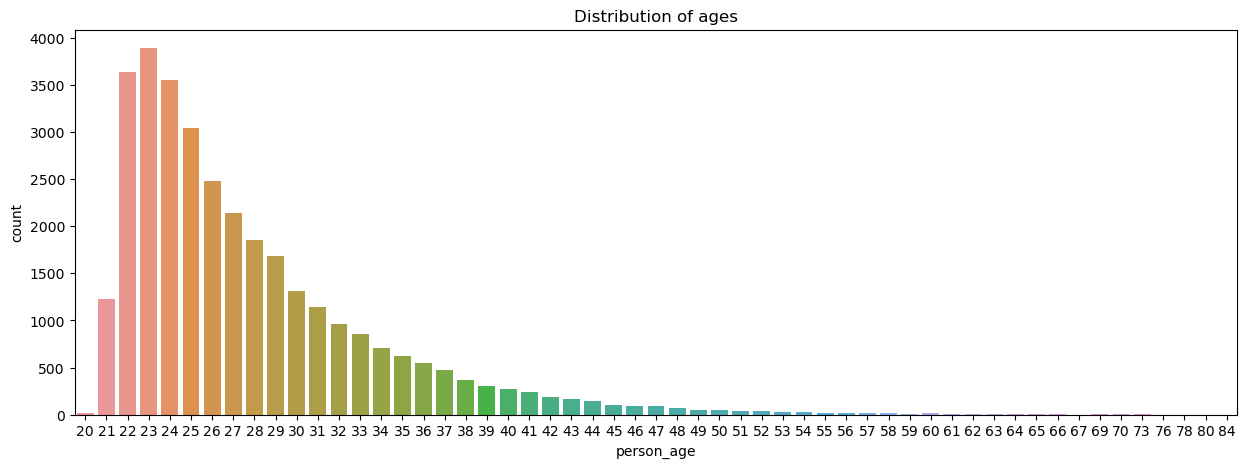

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'person_age' , data = df1)
plt.title('Distribution of ages');

#### most of the people who applying for loan are in age range 20 to 35

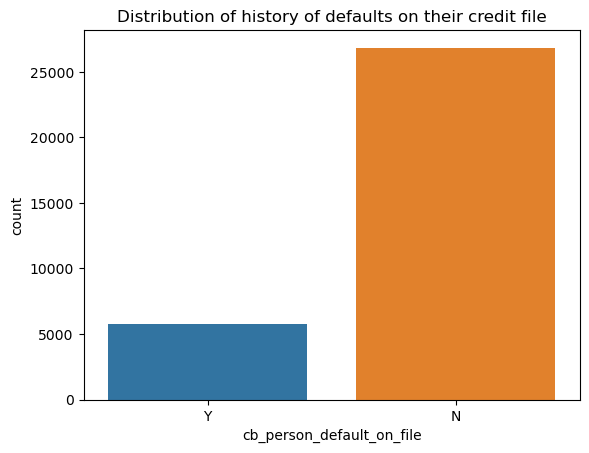

In [10]:
sns.countplot(x = 'cb_person_default_on_file' , data = crd)
plt.title('Distribution of history of defaults on their credit file');

#### more than 25000  borrower who does not have any history of defaults on their credit file.

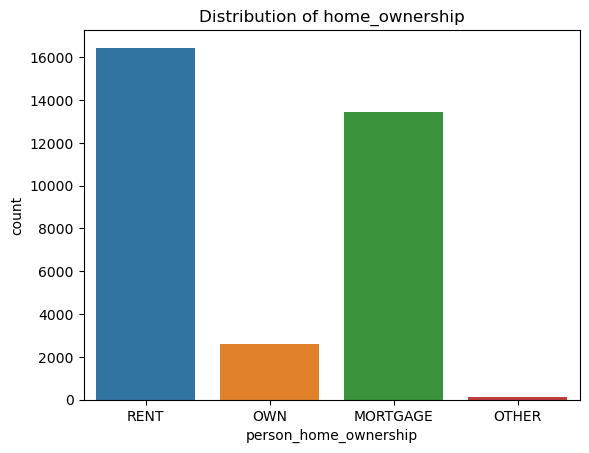

In [11]:
sns.countplot(x = 'person_home_ownership' , data = crd)
plt.title('Distribution of home_ownership');

#### the count of borrower who have rented homes is more than others that means Most of the borrower taking a loan doesnt own their own house

In [12]:
df1 = crd.groupby(['person_home_ownership'] , as_index = False).loan_amnt.sum().sort_values( by = 'loan_amnt' ,ascending = False)
df1

,person_home_ownership,loan_amnt
3,RENT,145749900
0,MORTGAGE,142163050
2,OWN,23333375
1,OTHER,1184975


In [13]:
df1.iplot(kind = "bar",x = "person_home_ownership" , y = "loan_amnt", title = 'Amount in million',
          xTitle = 'person_home_ownership', yTitle = 'loan_amnt')

#### From the above graph we conclude that a total loan amount of 145 million was disbursed to the rented house borrowers

In [14]:
df = pd.DataFrame(crd.loan_grade.value_counts().reset_index())
df.columns = ['Loan_Grade', 'Count']
df
plotly.express.pie(df , names = 'Loan_Grade' , values = 'Count' , title = 'total % of Loan_Grade according to their Count')

####  Loan Grade A(The borrower has a high creditworthiness, indicating low risk.) and B(relatively low-risk, but not as creditworthy as Grade A.) comprises of 65.2% of total

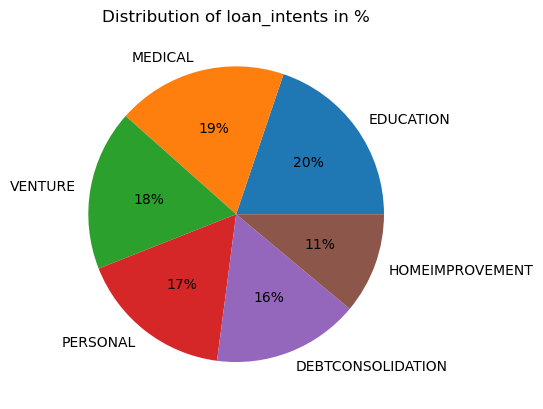

In [15]:
df = pd.DataFrame(crd.loan_intent.value_counts().reset_index())
df.columns = ['loan_intent', 'Count']
df

plt.pie(df.Count,labels = df.loan_intent,autopct='%1.0f%%')
plt.title('Distribution of loan_intents in %');

#### Loan Intent are equally almost distributed

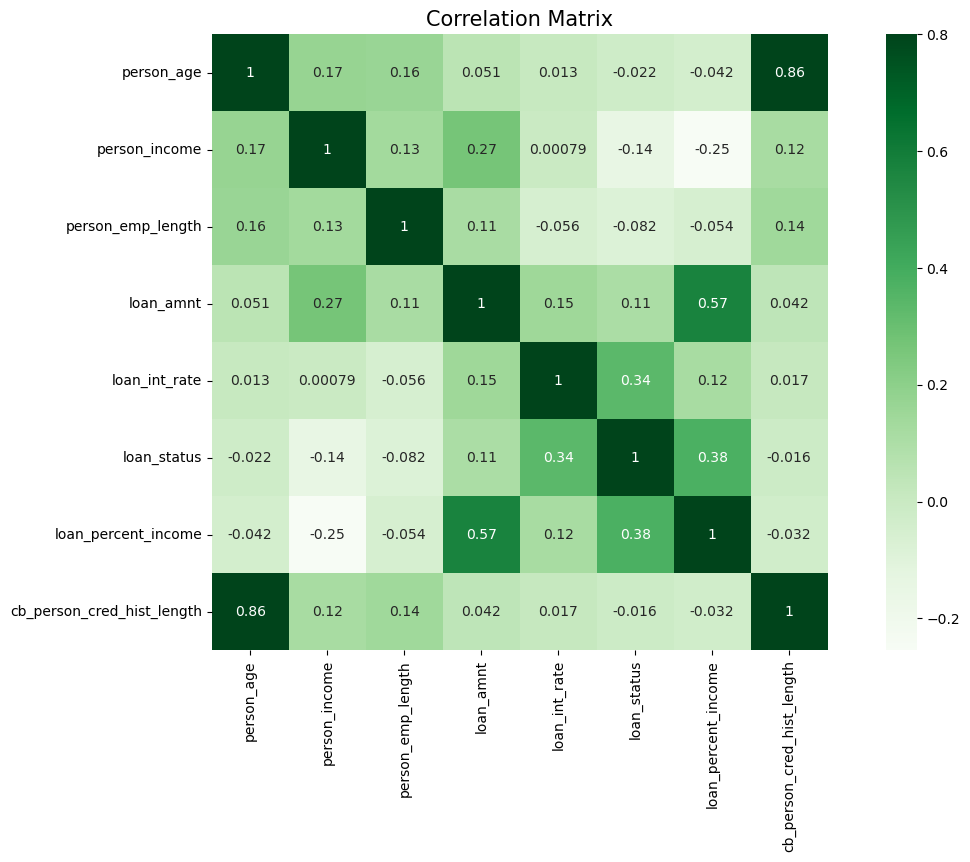

In [16]:
df = crd[crd.select_dtypes(exclude = 'object').columns] 
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), vmax =.8, square = True, annot = True,cmap='Greens' )
plt.title('Correlation Matrix',fontsize=15);

loan_status
0    25473
1     7108
Name: count, dtype: int64


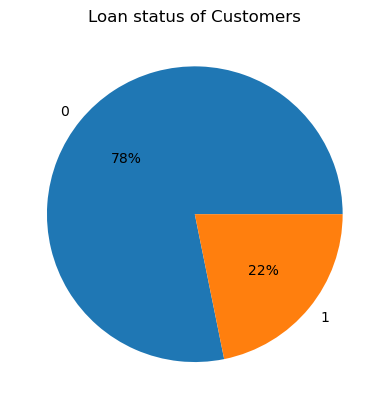

In [17]:
print(crd.loan_status.value_counts())
df = pd.DataFrame(crd.loan_status.value_counts().reset_index())
df.columns = ['loan_status', 'Count']


plt.pie(df.Count,labels = df.loan_status,autopct='%1.0f%%')
plt.title('Loan status of Customers');

#### there is a 78% of the loan is in the category where loan_status is 0 (not in default or successfully repaid). and there is a 22% of the loan is in the category where loan_status is 1 (in default or not successfully repaid).

# Data cleaning and sampling

###### Checking Nulls

In [98]:
crd.isnull().sum()[crd.isnull().sum()>0]

Series([], dtype: int64)

###### Null Filling

In [21]:
crd.person_emp_length.fillna(crd.person_emp_length.mean() , inplace = True)
crd.loan_int_rate.fillna(crd.loan_int_rate.mean() , inplace = True)

In [22]:
crd.isnull().sum()[crd.isnull().sum()>0]

Series([], dtype: int64)

###### Converting Categorical data into numeric format

In [23]:
# convert ordinal data
crd.person_home_ownership.replace({'RENT':0, 'OWN':1, 'MORTGAGE':2, 'OTHER':3},inplace = True)
crd.loan_grade.replace({'D':3, 'B':1, 'C':2, 'A':0, 'E':4, 'F':5, 'G':6},inplace = True)
crd.cb_person_default_on_file.replace({'Y':1, 'N':0},inplace = True)

In [24]:
crd[crd.select_dtypes(include = 'object').columns] = crd[crd.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [25]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int64  
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  int32  
 5   loan_grade                  32581 non-null  int64  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int32(1), int64(8)
memory usage: 2.9 MB


Data cleaning is done

In [26]:
crd1 = crd   # just a backup

## Outlier remove

In [27]:
def remove_outliers(df,col,k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print("Number of Outliers removed -->", df.shape[0] - df1.shape[0])

In [28]:
remove_outliers(crd,'loan_status',1)

(25473, 12)
Number of Outliers removed --> 7108


##### Data Sampling

In [29]:
crd.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

###### in this dataset there are 78% records are of class 0 and only 22% records are of class 1, we need  to handle this class imbalance  when we train the model

### oversampling

In [30]:
# train test spliting
crd_train , crd_test = train_test_split(crd , test_size = .2)

df1 = crd_train[crd_train.loan_status ==1]
crd_train = pd.concat([crd_train , df1])
crd_train.shape

(31759, 12)

###### Seperate X and Y

In [31]:
crd_train_x = crd_train.drop(['loan_status'],axis = 1)
crd_train_y = crd_train.loan_status

crd_test_x = crd_test.drop(['loan_status'],axis = 1)
crd_test_y = crd_test.loan_status

Sampling is done
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Model Building

### Logistic Regression

In [32]:
logreg.fit(crd_train_x , crd_train_y)

LogisticRegression()

##### prediction on train and test

In [33]:
pred_train = logreg.predict(crd_train_x)
pred_test = logreg.predict(crd_test_x)

##### Confusion Matrix

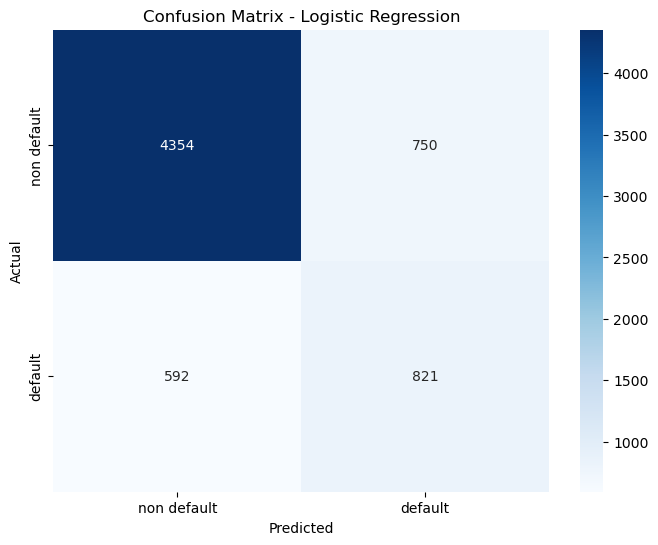

In [34]:
mat_test = confusion_matrix(crd_test_y , pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(mat_test, annot=True, fmt='d', cmap='Blues', xticklabels=['non default' , 'default'], yticklabels=['non default' , 'default'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
print('Classification Report : ')
print(classification_report(crd_test_y , pred_test))

Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      5104
           1       0.52      0.58      0.55      1413

    accuracy                           0.79      6517
   macro avg       0.70      0.72      0.71      6517
weighted avg       0.80      0.79      0.80      6517



In [34]:
accuracy_score(crd_test_y , pred_test)

0.79238913610557

In [36]:
recall_score(crd_test_y , pred_test)

0.581033262561925

In [37]:
precision_score(crd_test_y , pred_test)

0.5225970719287079

In [38]:
f1_score(crd_test_y , pred_test)

0.5502680965147453

In [39]:
#len(crd_test_x)

In [40]:
pred_prob_test = logreg.predict_proba(crd_test_x)    # it generating predicted probabilities for each class on the test dataset
len(pred_prob_test)  

6517

In [41]:
from sklearn.metrics import roc_auc_score ,roc_curve

In [42]:
roc_auc_score(crd_test_y , pred_prob_test[: , 1])   # area under the curve

0.8110970511173673

In [43]:
fpr , tpr , thres = roc_curve(crd_test_y , pred_prob_test[: , 1])

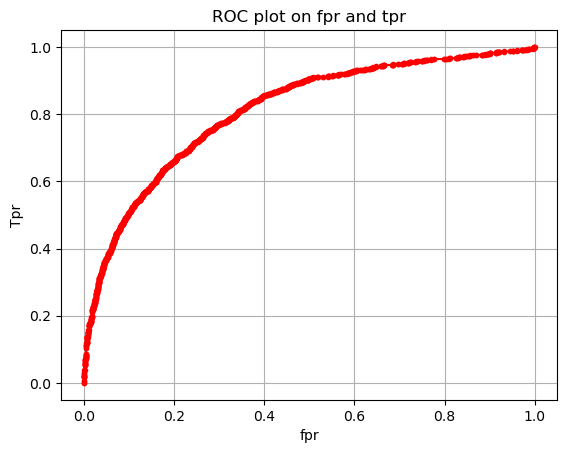

In [44]:
plt.plot(fpr , tpr , marker = '.' , color = 'red')
plt.xlabel('fpr')
plt.ylabel('Tpr')
plt.title('ROC plot on fpr and tpr')
plt.grid()

In [45]:
df1 = logreg.predict_proba(crd_test_x)
df1 = pd.DataFrame(df1)

df1.columns = ['P0' , 'P1']
df1['Actual']  = list(crd_test_y)
df1.head(5)

,P0,P1,Actual
0,0.866439,0.133561,0
1,0.311036,0.688964,0
2,0.292150,0.707850,0
3,0.851973,0.148027,0
4,0.794674,0.205326,0


In [46]:
df1.loc[df1.P1 < .55,'Predicted'] = 0
df1.loc[df1.P1 >= .55,'Predicted'] = 1

In [47]:
df1.head(10)

,P0,P1,Actual,Predicted
0,0.866439,0.133561,0,0.0
1,0.311036,0.688964,0,1.0
2,0.292150,0.707850,0,1.0
3,0.851973,0.148027,0,0.0
4,0.794674,0.205326,0,0.0
5,0.903926,0.096074,0,0.0
6,0.417210,0.582790,0,1.0
7,0.972834,0.027166,1,0.0
8,0.491905,0.508095,0,0.0
9,0.680799,0.319201,0,0.0


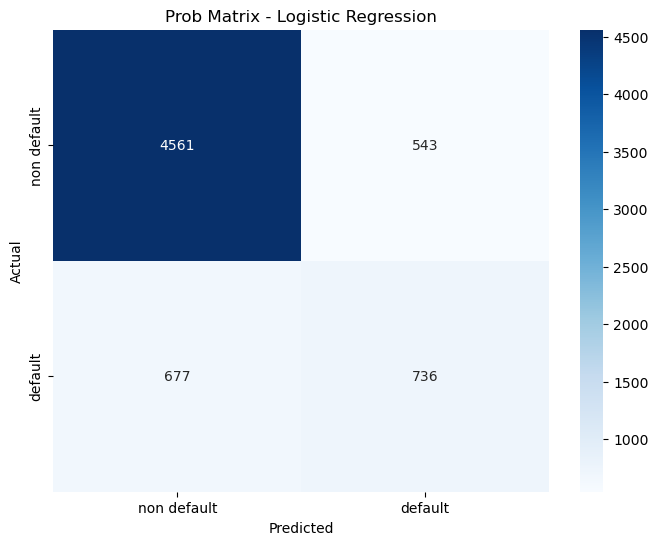

In [48]:
prob_mat = pd.crosstab(df1.Actual , df1.Predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(prob_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['non default' , 'default'], yticklabels=['non default' , 'default'])
plt.title('Prob Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
accuracy_score(df1.Actual , df1.Predicted)

0.8127972993708762

In [50]:
recall_score(df1.Actual , df1.Predicted)

0.5208775654635527

In [51]:
precision_score(df1.Actual , df1.Predicted)

0.5754495699765442

In [52]:
f1_score(df1.Actual , df1.Predicted)

0.5468053491827637

# decision tree

In [53]:
crd_train.loan_status.value_counts()

loan_status
0    20369
1    11390
Name: count, dtype: int64

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy",)

In [55]:
dt.fit(crd_train_x , crd_train_y)

DecisionTreeClassifier(criterion='entropy')

In [56]:
pred_test_dt = dt.predict(crd_test_x)

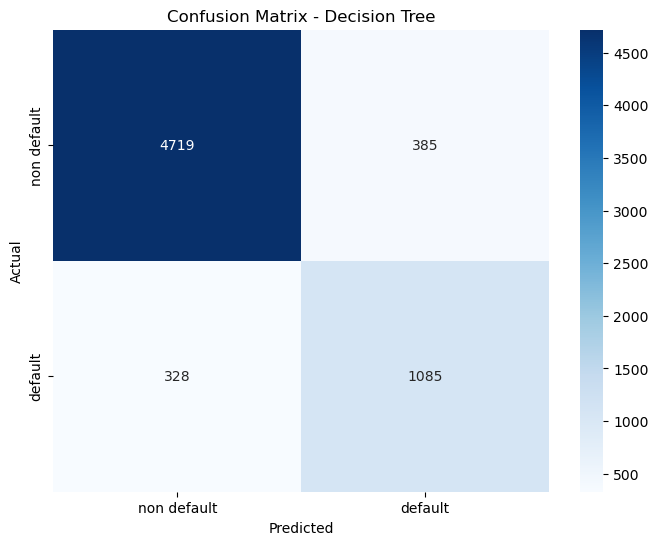

In [57]:
tab_crd = confusion_matrix(crd_test_y , pred_test_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(tab_crd, annot=True, fmt='d', cmap='Blues', xticklabels=['non default' , 'default'], yticklabels=['non default' , 'default'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:
accuracy_score(crd_test_y , pred_test_dt)

0.8905938315175694

In [59]:
recall_score(crd_test_y , pred_test_dt)

0.7678697806086341

In [60]:
precision_score(crd_test_y , pred_test_dt)

0.7380952380952381

In [61]:
f1_score(crd_test_y , pred_test_dt)

0.7526881720430108

## Feature importance

In [62]:
dt.feature_importances_

array([0.05045153, 0.1716657 , 0.11646725, 0.05851391, 0.07752801,
       0.17312   , 0.04364775, 0.07642487, 0.19323551, 0.00512919,
       0.0338163 ])

In [63]:
feat_imp = pd.DataFrame()
feat_imp['features'] = crd_train_x.columns
feat_imp['Imp']      = dt.feature_importances_
feat_imp = feat_imp.sort_values('Imp', ascending= False)
feat_imp

,features,Imp
8,loan_percent_income,0.193236
5,loan_grade,0.173120
1,person_income,0.171666
2,person_home_ownership,0.116467
4,loan_intent,0.077528
7,loan_int_rate,0.076425
3,person_emp_length,0.058514
0,person_age,0.050452
6,loan_amnt,0.043648
10,cb_person_cred_hist_length,0.033816



# Random Forest

In [64]:
crd_train.loan_status.value_counts()

loan_status
0    20369
1    11390
Name: count, dtype: int64

In [65]:
from  sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( n_estimators=200 )

In [66]:
rfc.fit(crd_train_x , crd_train_y)

RandomForestClassifier(n_estimators=200)

In [67]:
pred_test_rfc = rfc.predict(crd_test_x)

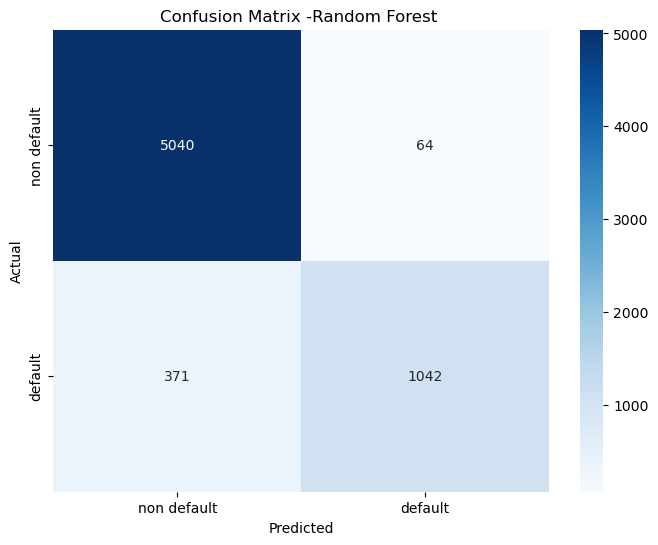

In [68]:
tab_rfc_crd = confusion_matrix(crd_test_y , pred_test_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(tab_rfc_crd, annot=True, fmt='d', cmap='Blues', xticklabels=['non default' , 'default'], yticklabels=['non default' , 'default'])
plt.title('Confusion Matrix -Random Forest ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [69]:
accuracy_score(crd_test_y , pred_test_rfc)

0.9332514960871566

In [70]:
recall_score(crd_test_y , pred_test_rfc)

0.7374380750176929

In [71]:
precision_score(crd_test_y , pred_test_rfc)

0.9421338155515371

In [72]:
f1_score(crd_test_y , pred_test_rfc)

0.8273124255657007

# SVM

In [73]:
crd_train.loan_status.value_counts()

loan_status
0    20369
1    11390
Name: count, dtype: int64

In [96]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')

In [97]:
svc.fit(crd_train_x , crd_train_y)

SVC()

In [76]:
pred_test_svm = svc.predict(crd_test_x)

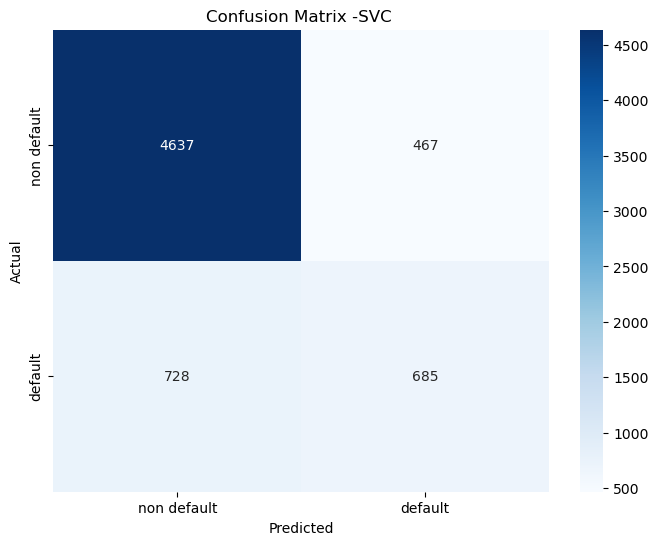

In [77]:
tab_crd = confusion_matrix(crd_test_y , pred_test_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(tab_crd, annot=True, fmt='d', cmap='Blues', xticklabels=['non default' , 'default'], yticklabels=['non default' , 'default'])
plt.title('Confusion Matrix -SVC ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
accuracy_score(crd_test_y , pred_test_svm)

0.8166334202854074

In [79]:
recall_score(crd_test_y , pred_test_svm)

0.4847841472045294

In [80]:
precision_score(crd_test_y , pred_test_svm)

0.5946180555555556

In [81]:
f1_score(crd_test_y , pred_test_svm)

0.5341130604288499

## Comparision Table

In [82]:
acc_list = [accuracy_score(df1.Actual , df1.Predicted) , accuracy_score(crd_test_y , pred_test_dt),
            accuracy_score(crd_test_y , pred_test_rfc) , accuracy_score(crd_test_y , pred_test_svm)]


recall_list = [recall_score(df1.Actual , df1.Predicted), recall_score(crd_test_y , pred_test_dt),
               recall_score(crd_test_y , pred_test_rfc) , recall_score(crd_test_y , pred_test_svm)]


precision_list = [precision_score(df1.Actual , df1.Predicted) , precision_score(crd_test_y , pred_test_dt),
                  precision_score(crd_test_y , pred_test_rfc) , precision_score(crd_test_y , pred_test_svm)]

f1_Score_list = [f1_score(df1.Actual , df1.Predicted) , f1_score(crd_test_y , pred_test_dt),
                  f1_score(crd_test_y , pred_test_rfc) , f1_score(crd_test_y , pred_test_svm)]


In [83]:
comp_table = pd.DataFrame()
comp_table['Accuracy'] = acc_list
comp_table['Recall'] = recall_list
comp_table['Precision'] = precision_list
comp_table['f1_Score'] = f1_Score_list
comp_table.index = ['Logistic_Reg' , 'Decision_tree' , 'Random_Forest' , 'SVM']
comp_table

,Accuracy,Recall,Precision,f1_Score
Logistic_Reg,0.812797,0.520878,0.575450,0.546805
Decision_tree,0.890594,0.767870,0.738095,0.752688
Random_Forest,0.933251,0.737438,0.942134,0.827312
SVM,0.816633,0.484784,0.594618,0.534113


# Interpretation :
### The Credot Risk dataset is Supervised classification dataset
### Using Machine Learning techniques for Credit Risk modeling that helps bank and other organizations to make better decision when giving out loans
### It helps to quick analyzer the customers financial history and other factors and predict if they are likely to repay a loan on time
### The Logistic regression ,Decision Tree , Random Forest , SVM algorithms are used to handel this supervised classification model
### Among these four model Random Forest gives good result
### Random Forest achieved the highest accuracy among the models, with 93.32%.
### Random Forest also achieved a high precision of 94.21%, indicating a low false positive rate.
### Decision Tree and Logistic Regression show relatively balanced performance.

## Hypertunning on decision tree

### To more improve the performance of decision tree by using Grid search 
##### Grid search is hyperparameter tunning that select the best combination of hpyerparameter 

In [84]:
from sklearn.model_selection import GridSearchCV

search_dict = {"criterion" : [ "gini" , "entropy"],
              "max_depth" : range(4,9),
              "min_samples_split" : [50,75,100]} 

In [85]:
grid = GridSearchCV(dt , param_grid = search_dict)

In [86]:
grid.fit(crd_train_x , crd_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'min_samples_split': [50, 75, 100]})

In [87]:
grid.best_params_ 

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 50}

In [88]:
pred_grid = grid.predict(crd_test_x)

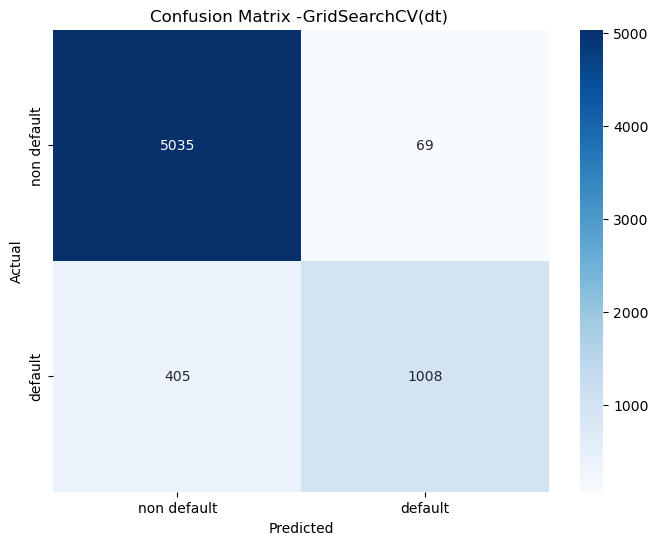

In [89]:
tab_grid = confusion_matrix(crd_test_y , pred_grid)
plt.figure(figsize=(8, 6))
sns.heatmap(tab_grid, annot=True, fmt='d', cmap='Blues', xticklabels=['non default' , 'default'], yticklabels=['non default' , 'default'])
plt.title('Confusion Matrix -GridSearchCV(dt) ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [90]:
accuracy_score(crd_test_y , pred_grid) 


0.927267147460488

In [91]:
recall_score(crd_test_y , pred_grid)

0.7133757961783439

In [92]:
precision_score(crd_test_y , pred_grid)

0.935933147632312

In [93]:
l1 = [accuracy_score(crd_test_y , pred_grid) ,recall_score(crd_test_y , pred_grid),precision_score(crd_test_y , pred_grid)]
final_result = pd.DataFrame(l1)
final_result.columns = ['Grid_search_dt']
final_result.index = ['Accuracy', 'Recall','Precision']
final_result

,Grid_search_dt
Accuracy,0.927267
Recall,0.713376
Precision,0.935933


# Conclusion: 
### After using Grid Search on decision tree model, the decision tree model achieved a 93% accuracy, effectively identifying 71% of actual loan defaults (recall), and when predicting defaults, it was correct about 93% of the time (precision). Overall, it demonstrates good performance in predicting credit risk.